# EC-TEL 2015 Learning Analytics Workshop

### Lalitha Agnihotri, Alfred Essa, Shirin Mojarad
#### McGraw-Hill Education

## Exploratory Data Analysis

Try to begin EDA with some provisional questions. A first goal should be to gain an intuitive understanding or "feel" for the dataset(s) by interactively asking questions, which lead to further and deeper questions.

- How many students registered?
- How many students completed the courses?
- What countries were they come from?
- What was the gender mix?
- What was their educational background?


### Import  libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# magic command for inline plot in notebook
%matplotlib inline 

### Load Data and Initial Verification

In [3]:
# load into pandas dataframe 
edx = pd.read_csv('edx.csv') #,  parse_dates=['start_time_DI','last_event_DI'])

In [4]:
# verify data set
edx.head()


,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9,NaN,NaN,0,NaN,1
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9,NaN,1,0,NaN,1
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16,NaN,NaN,0,NaN,1
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16,NaN,NaN,0,NaN,1
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16,NaN,NaN,0,NaN,1


In [5]:
# rename column names to something more meaningful
edx = edx.rename(columns={'final_cc_cname_DI':'country', 'userid_DI':'user_id', 'YoB': 'BirthYear'})


In [6]:
# verify number of records
print "Number of records in data set: ", len(edx)

Number of records in data set:  641138


In [7]:
# verify dtypes for each of the columns | some of the columns were parsed as object which could get tricky
edx.dtypes

course_id           object
user_id             object
registered           int64
viewed               int64
explored             int64
certified            int64
country             object
LoE_DI              object
BirthYear          float64
gender              object
grade               object
start_time_DI       object
last_event_DI       object
nevents            float64
ndays_act          float64
nplay_video        float64
nchapters          float64
nforum_posts         int64
roles              float64
incomplete_flag    float64
dtype: object

### Create new dataframe with subset of columns

In [8]:
edx_ = edx[['country','user_id','gender', 'registered','course_id','grade','viewed','explored','certified', 'LoE_DI']]

### Do some basic counts

In [9]:
print "The number of students in dataset: ", len(edx_['user_id'].unique())

The number of students in dataset:  476532


In [10]:

print "The number of countries in dataset: ", len(edx_['country'].unique())

The number of countries in dataset:  34


In [11]:
print "The number of courses in dataset: ", len(edx_['course_id'].unique())

The number of courses in dataset:  16


### Create Pivot Tables for Country Analysis

In [12]:
# pivot table for totals (counts) of students registered, viewed, explored, and certified
pv_sums =  edx_.pivot_table(index=['country'], aggfunc=np.sum)
pv_sums =  pv_sums[['viewed','explored','certified','registered']]

In [13]:
# pivot table for means (counts) of students viewed, explored, and certified
pv_means = edx_.pivot_table(index=['country'], aggfunc=np.mean)
pv_means = pv_means[['viewed','explored','certified', 'registered']]

In [14]:
# first few lines of pivot table showing counts of registered, viewed, explored and certified
pv_sums.tail()

,viewed,explored,certified,registered
country,,,,
Spain,7390,1415,837,10003
Ukraine,2954,469,203,4100
United Kingdom,15086,1759,870,22131
United States,117464,10132,4382,184240
Unknown/Other,32321,965,61,82029


In [16]:
pv_means.head()

,viewed,explored,certified,registered
country,,,,
Australia,0.607571,0.069014,0.030534,1
Bangladesh,0.594280,0.044940,0.010685,1
Brazil,0.650930,0.054603,0.025370,1
Canada,0.657089,0.068614,0.026142,1
China,0.656673,0.034043,0.011992,1


### Q: What are top ten countries by registration and what were their viewing, exploration, and certification counts?

In [17]:
top10 = pv_sums.sort(['registered'],ascending=False).head(10)

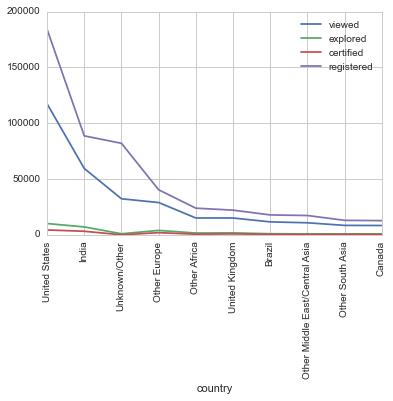

In [18]:
top10.plot(rot='vertical')

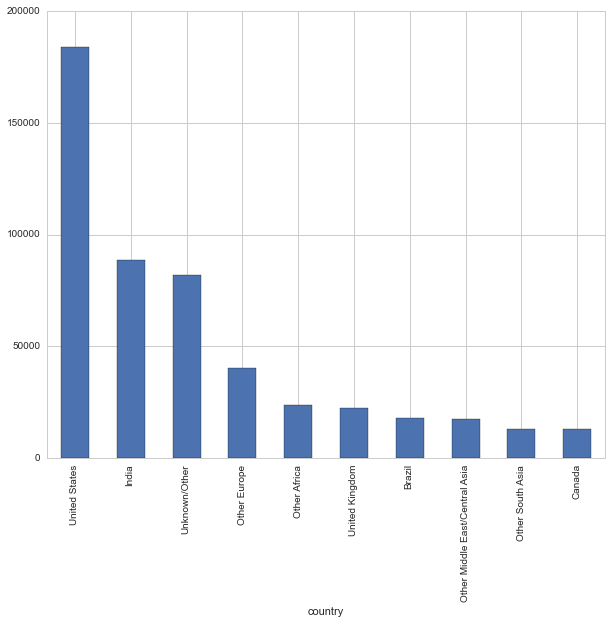

In [19]:
top10['registered'].plot(rot='vertical', kind='bar', figsize=(10,8))

### Which countries had the highest and lowest completion rates?

In [20]:
# create a new data frame with percentages
percentages = pd.DataFrame()
percentages['view_pctg']=(100*(pv_sums['viewed']/pv_sums['registered']))
percentages['exp_pctg']=(100*(pv_sums['explored']/pv_sums['registered']))
percentages['cert_pctg']=(100*(pv_sums['certified']/pv_sums['registered']))

In [21]:
percentages.head()

,view_pctg,exp_pctg,cert_pctg
country,,,
Australia,60.757127,6.901387,3.053435
Bangladesh,59.428033,4.494029,1.068510
Brazil,65.092966,5.460349,2.536962
Canada,65.708902,6.861360,2.614225
China,65.667311,3.404255,1.199226


In [22]:
bot10_completers = percentages.sort(['cert_pctg']).head(10)
top10_completers = percentages.sort(['cert_pctg'], ascending=False)

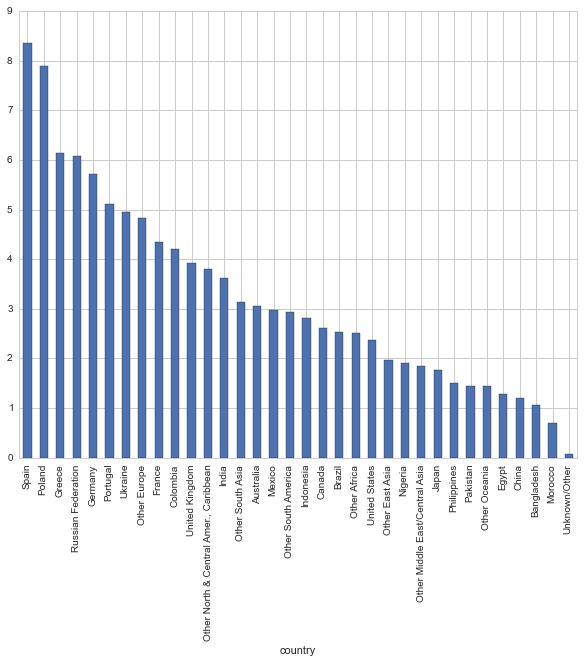

In [23]:
top10_completers['cert_pctg'].plot(rot='vertical', kind='bar', figsize=(10,8))

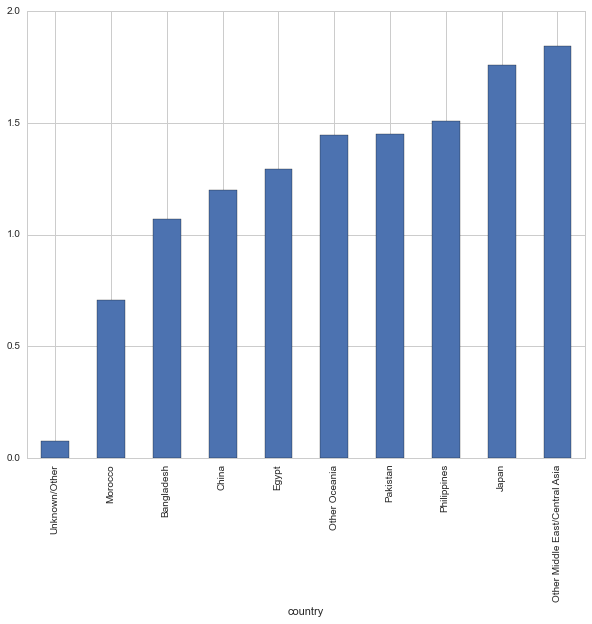

In [27]:
bot10_completers['cert_pctg'].plot(rot='vertical', kind='bar', figsize=(10,8))

In [26]:
pv_country = edx_.pivot_table(index=['country','gender'], aggfunc=np.mean)
pv_country = pv_country[['viewed','explored','certified']]

In [27]:
pv_country.head(10)

viewed  explored  certified
country    gender                               
Australia  f       0.577156  0.071861   0.040091
           m       0.606525  0.066485   0.026940
Bangladesh f       0.573770  0.065574   0.040984
           m       0.584305  0.041570   0.009324
Brazil     f       0.577759  0.036128   0.021733
           m       0.666721  0.054699   0.024028
Canada     f       0.598749  0.058591   0.027979
           m       0.678538  0.066486   0.022749
China      f       0.592292  0.030426   0.022312
           m       0.666910  0.033892   0.009840

### Are there differences in completion rates between men and women in different countries?

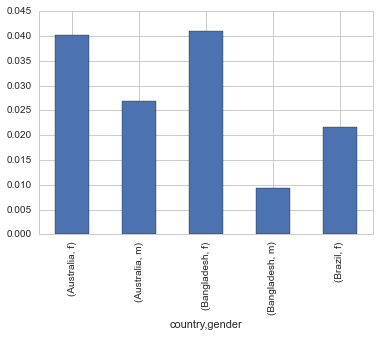

In [30]:
pv_country['certified'].head().plot(kind='bar')

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.]),
 <a list of 8 Text xticklabel objects>)

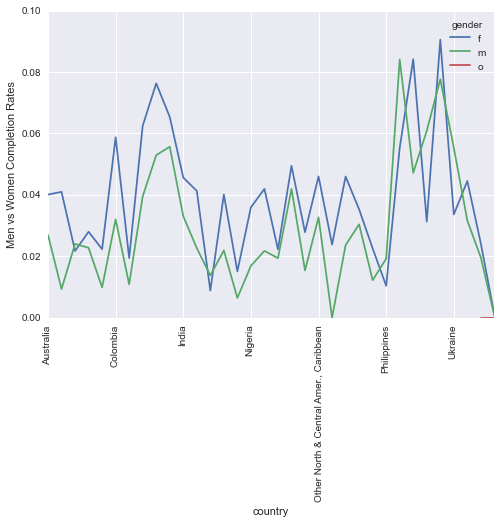

In [28]:
sns.set()
edx_.pivot_table('certified', index='country', columns='gender', aggfunc=np.mean).plot()

plt.ylabel("Men vs Women Completion Rates")

plt.xticks(rotation='vertical')


In [29]:
edx2 = edx_.pivot_table('certified', index='country', columns='gender', aggfunc=np.mean)
edx2.head(20)

gender,f,m,o
country,,,
Australia,0.040091,0.026940,NaN
Bangladesh,0.040984,0.009324,NaN
Brazil,0.021733,0.024028,NaN
Canada,0.027979,0.022749,NaN
China,0.022312,0.009840,NaN
Colombia,0.058757,0.032022,NaN
Egypt,0.019417,0.010848,NaN
France,0.062500,0.039514,NaN
Germany,0.076320,0.052922,NaN


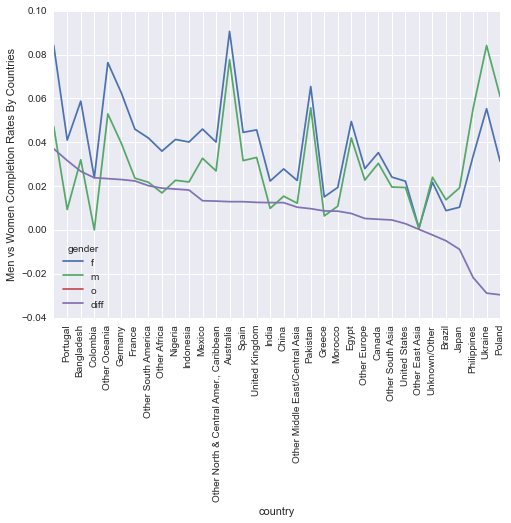

In [30]:
edx2['diff']=(edx2['f']-edx2['m'])
edx2.sort(['diff'], ascending=False).plot()
plt.xticks(range(1,edx2.shape[0]),edx2.reset_index().sort(['diff'], ascending=False).country.values ,rotation='vertical')

plt.ylabel("Men vs Women Completion Rates By Countries")


In [31]:
#Function for doing more exploration

In [32]:
edx_['college'] = edx_['course_id'].apply(lambda x: x[:x.find('/')])
edx2 = edx_.pivot_table('certified', index=['country','college'], columns='gender', aggfunc=np.mean)
edx2.head()

/Users/aessa/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


gender                      f         m   o
country    college                         
Australia  HarvardX  0.026549  0.028384 NaN
           MITx      0.085246  0.025057 NaN
Bangladesh HarvardX  0.027397  0.005149 NaN
           MITx      0.061224  0.011853 NaN
Brazil     HarvardX  0.020408  0.026917 NaN

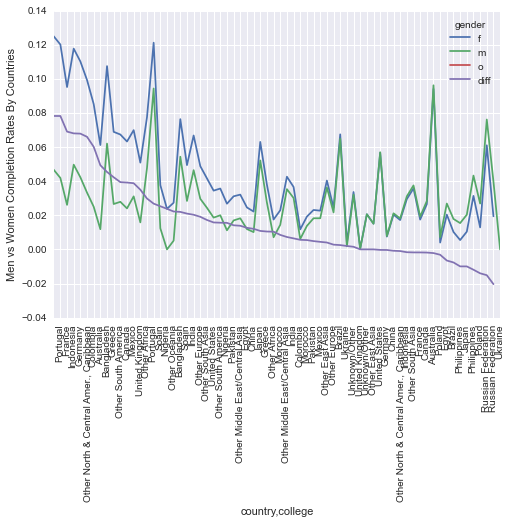

In [33]:
edx2['diff']=(edx2['f']-edx2['m'])
edx2.sort(['diff'], ascending=False).plot()
plt.xticks(range(1,edx2.shape[0]),edx2.reset_index().sort(['diff'], ascending=False).country.values ,rotation='vertical')

plt.ylabel("Men vs Women Completion Rates By Countries")


In [34]:
edx2.sort(['f'], ascending=False).head(20)

,gender,f,m,o,diff
country,college,,,,
Portugal,MITx,0.125000,0.046729,NaN,0.078271
Spain,MITx,0.121260,0.094406,NaN,0.026854
France,MITx,0.120172,0.041916,NaN,0.078256
Germany,MITx,0.117778,0.049715,NaN,0.068062
"Other North & Central Amer., Caribbean",MITx,0.110236,0.042321,NaN,0.067915
Greece,MITx,0.107527,0.062087,NaN,0.045440
Colombia,MITx,0.099359,0.033308,NaN,0.066051
Indonesia,MITx,0.095238,0.026138,NaN,0.069100
Poland,MITx,0.094118,0.096259,NaN,-0.002141
